In [15]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%load_ext google.colab.data_table
# Import dataset
tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions")
CO2_countries = tables[1]
CO2_countries.columns=['Country', 'Mt_1990', 'Mt_2005', 'Mt_2017', 'per_2017', 'change_1990_2017', 'land_2017', 'capita_2017', 'incl_2018', 'excl_2018']
CO2_countries = CO2_countries.loc[np.r_[3:67,68:212]]
CO2_countries

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


,Country,Mt_1990,Mt_2005,Mt_2017,per_2017,change_1990_2017,land_2017,capita_2017,incl_2018,excl_2018
3,Afghanistan,2.546,1.063,11.422,0.03%,348.6%,18.0,0.3,7.59,7.44
4,Albania,6.583,4.196,5.026,0.01%,-23.7%,175.0,1.7,5.32,5.56
5,Algeria,65.677,98.197,159.929,0.43%,143.5%,67.0,3.9,151.87,151.67
6,Angola,5.851,15.975,30.876,0.08%,427.7%,25.0,1.0,62.93,27.34
7,Anguilla,0.006,0.014,0.028,0.00%,366.7%,308.0,1.9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
207,Vietnam,20.182,99.231,218.729,0.59%,983.8%,660.0,2.3,245.36,257.86
208,Western Sahara,0.144,0.227,0.276,0.00%,91.7%,1.0,0.5,NaN,NaN
209,Yemen,6.887,21.768,12.503,0.03%,81.5%,24.0,0.4,9.31,9.31
210,Zambia,2.955,2.457,4.967,0.01%,68.1%,7.0,0.3,40.47,7.74


**Graph 1: CO2 of the bigger countries**

Make a graph of the CO2 emissions of the *5 biggest* CO2 producers in the world (based on the latest measurement). The x-axis should be the years of 1990, 2005 and 2017. If newer datapoints are added in the future please include them as well. The y-axis should represent the fossil CO2 emissions in Mt CO2 for the given years.

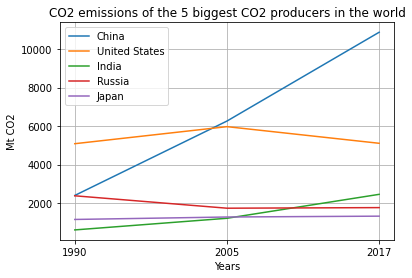

In [ ]:
# Sorting by Emission of 2017 in descending order, than selecting top 5 CO2 producers
Graph_1 = CO2_countries.sort_values(by=['Mt_2017'], ascending=False)
Graph_1 = Graph_1.iloc[:5,:4]
Graph_1.columns=['Country','1990','2005','2017']

# Creating the graph
fig, ax = plt.subplots()

years = Graph_1.columns[1:]

#For loop to plot all years for all 5 countries
for index, row in Graph_1.iterrows():
  plt.plot(years, row[1:], label=row[0])

#Plot layout data
plt.title('CO2 emissions of the 5 biggest CO2 producers in the world')
plt.ylabel('Mt CO2')
plt.xlabel('Years')
plt.legend(loc = 'upper left')
plt.grid()
plt.show()

**Graph 2: worst and best changers**


Because of climate change it's important that we curb our carbon dioxide emissions. So some countries will have lowered their emissions while others may have increased their emissions. Some countries will have better results in doing this than others. If we calculate the relative change and sort by that change we'll get a list with countries that are changing for the better at one end and countries that are changing less well on the other end.

Find the top three and bottom three countries with regards to lowering these emissions and plot their results.

The x-axis should have be the years of 1990, 2005 and 2017. If newer datapoints are added in the future please include them as well. The y-axis should represent the relative amount of CO2 emitted where the measurement in 1990 is 100%.

An example: Afghanistan emitted 2546Mt of CO2 in 1990 (which is the 100%). The relative amount in 2005 would be 1063/2546 * 100 = 41.75%. The relative amount in 2017 would be 11.422/2546 * 100 = 448.62%. So if Afghanistan is on the chart the line would go down first and then back up again.



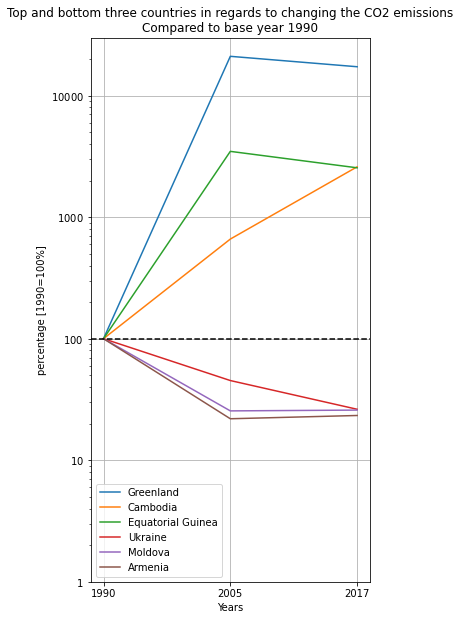

In [4]:
CO2_countries['relative_change_1990'] = CO2_countries['Mt_1990']/ CO2_countries['Mt_1990'] * 100
CO2_countries['relative_change_2005'] = CO2_countries['Mt_2005']/ CO2_countries['Mt_1990'] * 100
CO2_countries['relative_change_2017'] = CO2_countries['Mt_2017']/ CO2_countries['Mt_1990'] * 100

# Graph_2 = CO2_countries[['Country', 'Mt_1990', 'Mt_2005', 'Mt_2017', 'relative_change_1990', 'relative_change_2005','relative_change_2017']]
Graph_2 = CO2_countries[['Country', 'relative_change_1990', 'relative_change_2005','relative_change_2017']]
Graph_2 = Graph_2.sort_values(by=['relative_change_2017'], ascending=False)
Graph_2

# Select top 3 countries that changed in regards to 1990
Graph_2_top = Graph_2.head(3)

#Select bottom 3 countries that changed in regards to 1990
Graph_2_bottom = Graph_2.tail(3)

#combine the two dataframes
Graph_2 = [Graph_2_top, Graph_2_bottom]
Graph_2 = pd.concat(Graph_2)
Graph_2.columns=['Country','1990','2005','2017']

# Creating the graph
fig, ax = plt.subplots(figsize=[5,10])

years = Graph_2.columns[1:]

#For loop to plot all years for all 5 countries
for index, row in Graph_2.iterrows():
  plt.plot(years, row[1:], label=row[0])

#Plot the data and change the layout, I used a logaritmic scale because of the high differences between the top and bottom 3 changers.
plt.title('Top and bottom three countries in regards to changing the CO2 emissions\nCompared to base year 1990')
plt.ylabel('percentage [1990=100%]')
ax.set_yscale('log')
plt.yticks([1,10,100,1000,10000])
plt.xlabel('Years')
#make it neat
plt.axhline(y=100, color = 'black', linestyle = '--')
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
ax.yaxis.set_major_formatter(formatter) 
plt.legend(loc = 'best')
plt.grid(which = 'major')
plt.show()

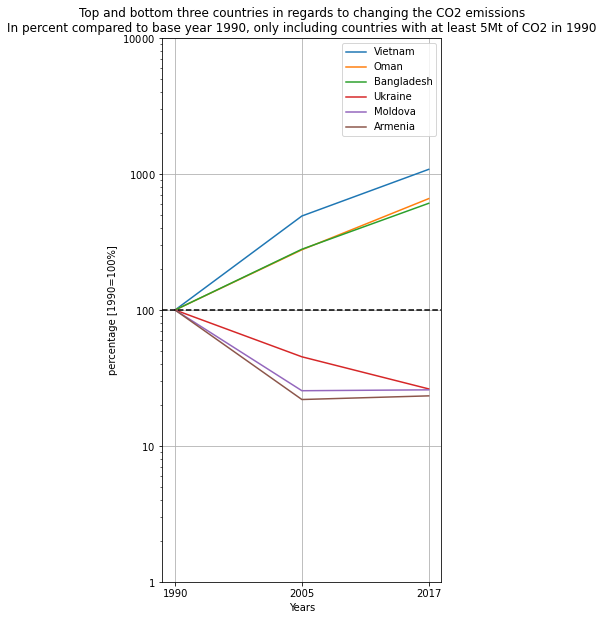

In [23]:
CO2_countries['relative_change_1990'] = CO2_countries['Mt_1990']/ CO2_countries['Mt_1990'] * 100
CO2_countries['relative_change_2005'] = CO2_countries['Mt_2005']/ CO2_countries['Mt_1990'] * 100
CO2_countries['relative_change_2017'] = CO2_countries['Mt_2017']/ CO2_countries['Mt_1990'] * 100

Graph_3 = CO2_countries.loc[CO2_countries['Mt_1990'] > 5]

# Graph_2 = CO2_countries[['Country', 'Mt_1990', 'Mt_2005', 'Mt_2017', 'relative_change_1990', 'relative_change_2005','relative_change_2017']]
Graph_3 = Graph_3[['Country', 'relative_change_1990', 'relative_change_2005','relative_change_2017']]
Graph_3 = Graph_3.sort_values(by=['relative_change_2017'], ascending=False)
Graph_3

# Select top 3 countries that changed in regards to 1990
Graph_3_top = Graph_3.head(3)

#Select bottom 3 countries that changed in regards to 1990
Graph_3_bottom = Graph_3.tail(3)

#combine the two dataframes
Graph_3 = [Graph_3_top, Graph_3_bottom]
Graph_3 = pd.concat(Graph_3)
Graph_3.columns=['Country','1990','2005','2017']

# Creating the graph
fig, ax = plt.subplots(figsize=[5,10])

years = Graph_3.columns[1:]

#For loop to plot all years for all 5 countries
for index, row in Graph_3.iterrows():
  plt.plot(years, row[1:], label=row[0])

#Plot the data and change the layout, I used a logaritmic scale because of the high differences between the top and bottom 3 changers.
plt.title('Top and bottom three countries in regards to changing the CO2 emissions\nIn percent compared to base year 1990, only including countries with at least 5Mt of CO2 in 1990')
plt.ylabel('percentage [1990=100%]')
ax.set_yscale('log')
plt.yticks([1,10,100,1000,10000])
plt.xlabel('Years')
#make it neat
plt.axhline(y=100, color = 'black', linestyle = '--')
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
ax.yaxis.set_major_formatter(formatter) 
plt.legend(loc = 'best')
plt.grid(which = 'major')
plt.show()